# AutoML

Cuando utilizar AutoML
* Tenemos un problema que involucra una de estas opciones.
     * Imagenes
         * Clasificacion (A nivel de imagen)
         * Detección de objectos (A nivel de sección)
         * Segmentation (A nivel de pixel)
     * Texto
         * Clasificación de texto
         * Extracción de entidades
         * Analisis de sentimiento
     * Datos tabulares (CSV)
         * Regresión
         * Clasificacion
         * Predicción (Forecasting)
     * Video
         * Clasificación
         * Reconocimiento de acciones
         * Seguimiento de objetos (Object tracking)
         
* El problema es básico.
* El equipo es pequeño o no tiene experiencia.
* Se búsca un prototico o prueba de concepto rápida.
* El modelo no necesitaria ser mejorado

## Ejemplo con datos tabulares

* La primera linea del CSV ha de ser la cabecera, estos son los nombres de las columnas
* Las columnas pueden contener caracteres alfanúmericos y la barra baja "_" (no puede comenzar por)
* Cada CSV no puede pasar de 10GB, si pesa mas de 10GB lo puedes repartir en varios CSV hasta un máximo de 100GB
* El delimitador ha de ser la coma ",".
* Al menos 1000 filas para Tabular Data, 100 imagenes por clase para Vision AI
* El CSV se sube con la variable ha predecir incluida
    
No hace falta delimitar el schema del CSV (si las columnas son enteros, flotantes, strings..., etc), Vertex AI lo hace por ti.
Se puede repartir los datos entre entrenamiento, validación y test de forma automática o manual

## Automático
Ejemplo para un caso sin asignar

```csv
"John","Doe","555-55-5555"
"Jane","Doe","444-44-4444"
"Roger","Rogers","123-45-6789"
"Sarah","Smith","333-33-3333"
```

## Manual
Ejemplo con los datos asignados
```csv
"TRAIN","John","Doe","555-55-5555"
"TEST","Jane","Doe","444-44-4444"
"TRAIN","Roger","Rogers","123-45-6789"
"VALIDATE","Sarah","Smith","333-33-3333"
```


## Manual/Automático
```csv
"UNASSIGNED","John","Doe","555-55-5555"
"TEST","Jane","Doe","444-44-4444"
"UNASSIGNED","Roger","Rogers","123-45-6789"
"UNASSIGNED","Sarah","Smith","333-33-3333"
```

## Chronologically

En este caso se asignan los casos en el orden de aparición en el CSV. Por ejemplo un reparto 80 10 10 daría como resultado
* El primer 80% de las líneas del CSV se asignaria a entrenamiento, TRAIN.
* El siguiente 10% se asignaria a validacion, VALIDATION.
* El último 10% se asignaria a test, TEST.

## Datos de imagenes



In [1]:
from sklearn.datasets import fetch_covtype
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
df = fetch_covtype(return_X_y=False, as_frame=True)['frame']
df = df[df.Cover_Type.isin([5,3])].sample(2000).reset_index(drop=True)
#df.to_csv("cover.csv", index=False)
#df = df[["Wilderness_Area_3", "Wilderness_Area_0","Elevation", "Cover_Type"]]

In [3]:
rfc = RandomForestClassifier(warm_start=True, n_estimators=30)
train = df.head(1500)
test = df.tail(500)
X_train, y_train = train.iloc[:, :-1].values, train.iloc[:, -1:].values.reshape(-1)
X_test, y_test = test.iloc[:, :-1].values, test.iloc[:, -1:].values.reshape(-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[395,   3],
       [  8,  94]])

In [4]:
import matplotlib.pyplot as plt
import numpy as np

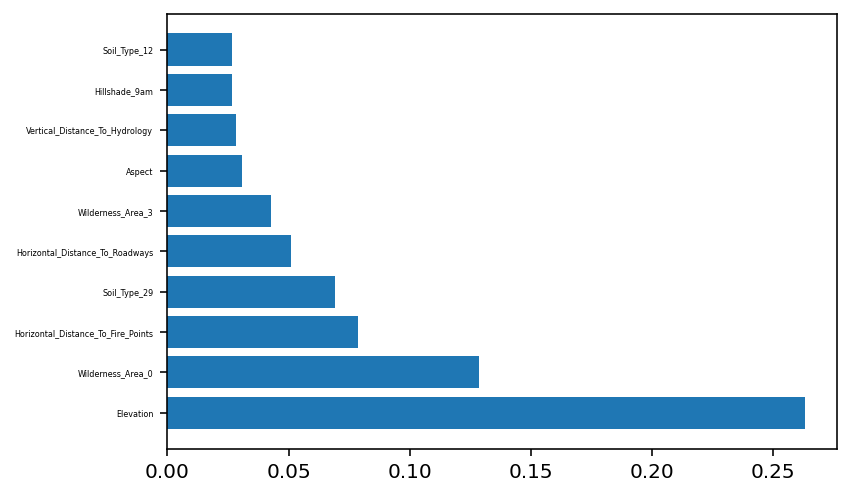

In [5]:
fig, ax = plt.subplots(dpi=144)
order = np.argsort(rfc.feature_importances_)[::-1]
names = df.columns[:-1][order]
values = rfc.feature_importances_[order]
_ = plt.barh(y=names[:10], width=values[:10])
_ = plt.yticks(fontsize=4)
ax.xaxis.label.set_size(10)

In [14]:
import seaborn as sns

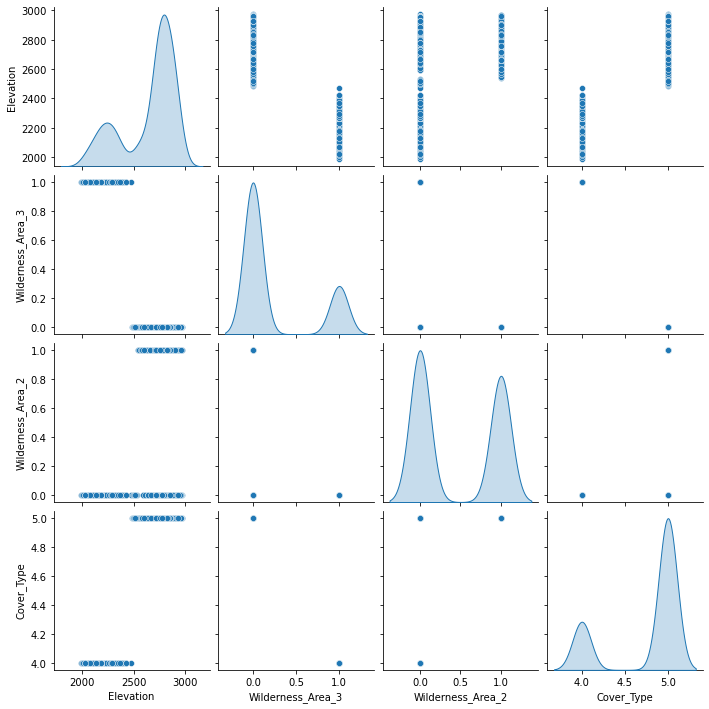

In [19]:
sns.pairplot(df.head(1000)[["Elevation", "Wilderness_Area_3", "Wilderness_Area_2", "Cover_Type"]], diag_kind='kde')

## Ejercicio - Datos Tabulados

Lleva este set de datos a Vertex AI Datasets y entrena un modelo.

In [ ]:
df = fetch_covtype(return_X_y=False, as_frame=True)['frame']
df = df[df.Cover_Type.isin([5,3])].sample(2000).reset_index(drop=True)

## Ejercicio - Datos Imagenes

Vamos a crear y a etiqueta un dataset de imagenes para Object Detection. [Descargar](https://drive.google.com/file/d/1PmW4B7Rctv4d0TRI3N8jytyPoUYSTkfr/view?usp=sharing) el siguiente ZIP. Se trata de un dataset de la famosa web [Kaggle](https://www.kaggle.com/jipingsun/object-detection-obama).
* Descargar el dataset a nuestro entorno/PC/Laptop
* Creamos un dataset con las imagenes.
* Etiquetamos unas cuantas imagenes (En principio con unas 100 debería bastar).
* Entrenamos modelo

## Ejercicio - Datos Imagenes completo

[Vertex AI Object Detection Documentation](https://cloud.google.com/vision/automl/object-detection/docs/how-to)

Tomando el mismo dataset que el ejercicio anterior, vamos a emplear a preparar los archivos .CSV que vienen en el zip y adaptarlos al estilo de Vertex AI.

* Adaptar CSV al estilo Vertex AI Object Detection [Informacion](https://cloud.google.com/vertex-ai/docs/datasets/prepare-image#object-detection)
* Crear dataset
* Entrenar modelo (Si queremos) con todas las imágenes.

# Métricas

Links a las tipicas métricas que podemos encontrarnos, ninguna de ellas es especial de Vertex AI por lo que en principio ya tendreis un idea de como funcionan.

## Matriz de confusión
[Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

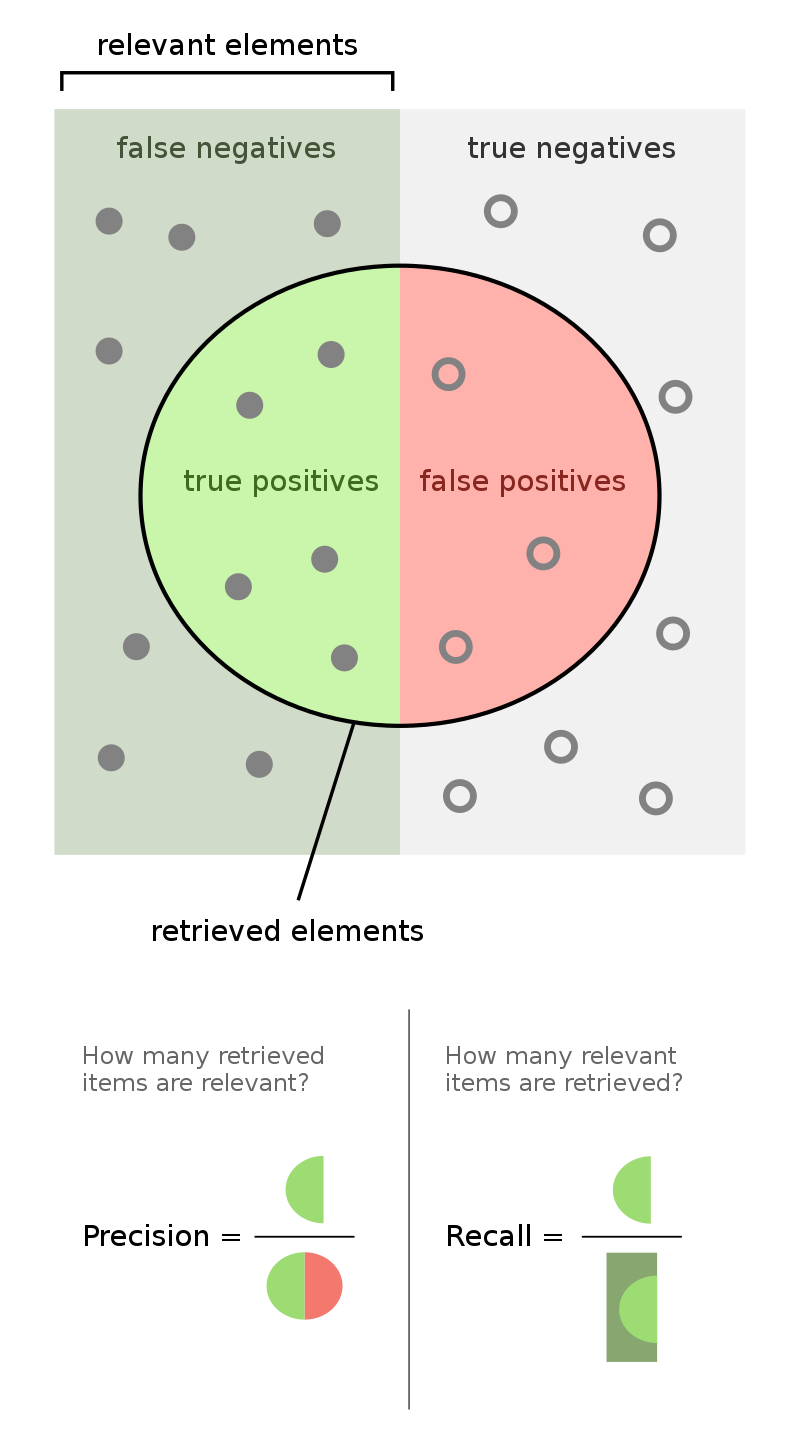

In [2]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png")

$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$
$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$
$$ \text{F1 Score} = 2 \frac{\text{Precision} \text{Recall}}{\text{Precision} + \text{Recall}}$$ 

## ROC Curve

In [ ]:
Image("https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png")

## IoU/Jaccard Index 
[IoU](https://en.wikipedia.org/wiki/Jaccard_index)

In [ ]:
# 